Step 2: Import all the libraries and set up all the requirements that you will be 
needed(optional). 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier
from xgboost import XGBClassifier

Imported all liabraries which required for classification & EDA

Step 3: Read the train and test data sets, and check for the datatype

In [2]:
test=pd.read_csv('test.csv')
test

ID Customer_ID      Month             Name   Age          SSN  \
0       0x160a   CUS_0xd40  September    Aaron Maashoh    23  821-00-0265   
1       0x160b   CUS_0xd40    October    Aaron Maashoh    24  821-00-0265   
2       0x160c   CUS_0xd40   November    Aaron Maashoh    24  821-00-0265   
3       0x160d   CUS_0xd40   December    Aaron Maashoh   24_  821-00-0265   
4       0x1616  CUS_0x21b1  September  Rick Rothackerj    28  004-07-5839   
...        ...         ...        ...              ...   ...          ...   
49995  0x25fe5  CUS_0x8600   December   Sarah McBridec  4975  031-35-0942   
49996  0x25fee  CUS_0x942c  September            Nicks    25  078-73-5990   
49997  0x25fef  CUS_0x942c    October            Nicks    25  078-73-5990   
49998  0x25ff0  CUS_0x942c   November            Nicks    25  078-73-5990   
49999  0x25ff1  CUS_0x942c   December            Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist      19114.12            1824.843333                  3  ...   
1      Scientist      19114.12            1824.843333                  3  ...   
2      Scientist      19114.12            1824.843333                  3  ...   
3      Scientist      19114.12                    NaN                  3  ...   
4        _______      34847.84            3037.986667                  2  ...   
...          ...           ...                    ...                ...  ...   
49995  Architect      20002.88            1929.906667                 10  ...   
49996   Mechanic      39628.99                    NaN                  4  ...   
49997   Mechanic      39628.99            3359.415833                  4  ...   
49998   Mechanic      39628.99                    NaN                  4  ...   
49999   Mechanic      39628.99            3359.415833                  4  ...   

       Num_Credit_Inquiries  Credit_Mix Outstanding_Debt  \
0                    2022.0        Good           809.98   
1                       4.0        Good           809.98   
2                       4.0        Good           809.98   
3                       4.0        Good           809.98   
4                       5.0        Good           605.03   
...                     ...         ...              ...   
49995                  12.0           _           3571.7   
49996                   7.0        Good           502.38   
49997                   7.0        Good           502.38   
49998                   7.0        Good           502.38   
49999                   7.0           _           502.38   

      Credit_Utilization_Ratio      Credit_History_Age Payment_of_Min_Amount  \
0                    35.030402   22 Years and 9 Months                    No   
1                    33.053114  22 Years and 10 Months                    No   
2                    33.811894                     NaN                    No   
3                    32.430559   23 Years and 0 Months                    No   
4                    25.926822   27 Years and 3 Months                    No   
...                        ...                     ...                   ...   
49995                34.780553                     NaN                   Yes   
49996                27.758522  31 Years and 11 Months                    NM   
49997                36.858542   32 Years and 0 Months                    No   
49998                39.139840   32 Years and 1 Months                    No   
49999                34.108530   32 Years and 2 Months                    No   

      Total_EMI_per_month  Amount_invested_monthly  \
0               49.574949       236.64268203272135   
1               49.574949       21.465380264657146   
2               49.574949       148.23393788500925   
3               49.574949        39.08251089460281   
4               18.816215       39.684018417945296   
...                   ...                      ...   
49995           60.964772       146.48632477751087   


In [3]:
test.shape

(50000, 27)

In [4]:
test.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
dtype: object

In [5]:
train=pd.read_csv('train.csv')
train

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist      19114.12            1824.843333                  3  ...   
1      Scientist      19114.12                    NaN                  3  ...   
2      Scientist      19114.12                    NaN                  3  ...   
3      Scientist      19114.12                    NaN                  3  ...   
4      Scientist      19114.12            1824.843333                  3  ...   
...          ...           ...                    ...                ...  ...   
99995   Mechanic      39628.99            3359.415833                  4  ...   
99996   Mechanic      39628.99            3359.415833                  4  ...   
99997   Mechanic      39628.99            3359.415833                  4  ...   
99998   Mechanic      39628.99            3359.415833                  4  ...   
99999   Mechanic     39628.99_            3359.415833                  4  ...   

       Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0               _            809.98                26.822620   
1            Good            809.98                31.944960   
2            Good            809.98                28.609352   
3            Good            809.98                31.377862   
4            Good            809.98                24.797347   
...           ...               ...                      ...   
99995           _            502.38                34.663572   
99996           _            502.38                40.565631   
99997        Good            502.38                41.255522   
99998        Good            502.38                33.638208   
99999        Good            502.38                34.192463   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 1 Months                     No           49.574949   
1                         NaN                     No           49.574949   
2       22 Years and 3 Months                     No           49.574949   
3       22 Years and 4 Months                     No           49.574949   
4       22 Years and 5 Months                     No           49.574949   
...                       ...                    ...                 ...   
99995   31 Years and 6 Months                     No           35.104023   
99996   31 Years and 7 Months                     No           35.104023   
99997   31 Years and 8 Months                     No           35.104023   
99998   31 Years and 9 Months                     No           35.104023   
99999  31 Years and 10 Months                     No           35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0           80.41529543900253   High_spent_Small_value_payments   
1          118.28022162236736    Low_spent_Large_value_payments   
2             81.699521264648   Low_spent_Medium_value_payments   
3           199.4580743910713    Low_spent_Small_value_payments   
4          41.420153086217326  High_spent_Medium_value_payments   
...                       ...                               ...   

In [6]:
train.shape

(100000, 28)

In [7]:
train.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

Here imported all train,test and sample data and checked its type

Step 4: Fix the problem that the features have been wrongly identified.
 Note: One way to clean the training and testing data is to combine both train and test 
datasets. Then do the cleaning. 
i) Clean the anomalies in the categorical variables. A few anomalies have been 
mentioned here. 
1. Occupation - _______
2. SSN - #F%$D@*&8
3. Payment Behaviour - !@9#%8
Replace the above anomalies by replacing them with the mode of each customer.
ii) Clean the anomalies for numerical variables. 
Ex: 
1. Age has above 8000 values therefore replace the values that are above 100 or 85 
with median values.
Note: I encourage you to replace the abnormal values with customer ID-wise 
median replacement for the customers who have above and below abnormal values. 
(customer-wise median means the median value for each customer. Example: customer aaa 
Annual Income has anomaly value in one row so replace that with customer aaa Annual 
Income median value. )

In [8]:
train.Occupation.unique()

array(['Scientist', '_______', 'Teacher', 'Engineer', 'Entrepreneur',
       'Developer', 'Lawyer', 'Media_Manager', 'Doctor', 'Journalist',
       'Manager', 'Accountant', 'Musician', 'Mechanic', 'Writer',
       'Architect'], dtype=object)

In [9]:
train['Occupation'].replace('_______',np.nan,inplace=True)

In [10]:
test['Occupation'].replace('_______',np.nan,inplace=True)

In [11]:
train.SSN.unique()

array(['821-00-0265', '#F%$D@*&8', '004-07-5839', ..., '133-16-7738',
       '031-35-0942', '078-73-5990'], dtype=object)

In [12]:
train['SSN'].replace('#F%$D@*&8',np.nan,inplace=True)

In [13]:
test['SSN'].replace('#F%$D@*&8',np.nan,inplace=True)

In [14]:
train.Payment_Behaviour.unique()

array(['High_spent_Small_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments',
       'Low_spent_Small_value_payments',
       'High_spent_Medium_value_payments', '!@9#%8',
       'High_spent_Large_value_payments'], dtype=object)

In [15]:
train.Payment_Behaviour.replace('!@9#%8',np.nan,inplace=True)

In [16]:
test.Payment_Behaviour.replace('!@9#%8',np.nan,inplace=True)

2. Few columns have - negative values but they are not supposed to have negative 
values. So replace the negative values with the median by doing a customer-wise median. 
3. Go through each variable and find out the other mistakes. And handle them

In [17]:
train.Age.unique()

array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [18]:
train['Age'] = train['Age'].apply(lambda x: x.replace('_', ''))
train 

ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist      19114.12            1824.843333                  3  ...   
1      Scientist      19114.12                    NaN                  3  ...   
2      Scientist      19114.12                    NaN                  3  ...   
3      Scientist      19114.12                    NaN                  3  ...   
4      Scientist      19114.12            1824.843333                  3  ...   
...          ...           ...                    ...                ...  ...   
99995   Mechanic      39628.99            3359.415833                  4  ...   
99996   Mechanic      39628.99            3359.415833                  4  ...   
99997   Mechanic      39628.99            3359.415833                  4  ...   
99998   Mechanic      39628.99            3359.415833                  4  ...   
99999   Mechanic     39628.99_            3359.415833                  4  ...   

       Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0               _            809.98                26.822620   
1            Good            809.98                31.944960   
2            Good            809.98                28.609352   
3            Good            809.98                31.377862   
4            Good            809.98                24.797347   
...           ...               ...                      ...   
99995           _            502.38                34.663572   
99996           _            502.38                40.565631   
99997        Good            502.38                41.255522   
99998        Good            502.38                33.638208   
99999        Good            502.38                34.192463   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
0       22 Years and 1 Months                     No           49.574949   
1                         NaN                     No           49.574949   
2       22 Years and 3 Months                     No           49.574949   
3       22 Years and 4 Months                     No           49.574949   
4       22 Years and 5 Months                     No           49.574949   
...                       ...                    ...                 ...   
99995   31 Years and 6 Months                     No           35.104023   
99996   31 Years and 7 Months                     No           35.104023   
99997   31 Years and 8 Months                     No           35.104023   
99998   31 Years and 9 Months                     No           35.104023   
99999  31 Years and 10 Months                     No           35.104023   

      Amount_invested_monthly                 Payment_Behaviour  \
0           80.41529543900253   High_spent_Small_value_payments   
1          118.28022162236736    Low_spent_Large_value_payments   
2             81.699521264648   Low_spent_Medium_value_payments   
3           199.4580743910713    Low_spent_Small_value_payments   
4          41.420153086217326  High_spent_Medium_value_payments   
...                       ...                               ...   

In [19]:
train.Age.unique()

array(['23', '-500', '28', ..., '4808', '2263', '1342'], dtype=object)

In [20]:
test['Age'] = test['Age'].apply(lambda x: x.replace('_', ''))
test

ID Customer_ID      Month             Name   Age          SSN  \
0       0x160a   CUS_0xd40  September    Aaron Maashoh    23  821-00-0265   
1       0x160b   CUS_0xd40    October    Aaron Maashoh    24  821-00-0265   
2       0x160c   CUS_0xd40   November    Aaron Maashoh    24  821-00-0265   
3       0x160d   CUS_0xd40   December    Aaron Maashoh    24  821-00-0265   
4       0x1616  CUS_0x21b1  September  Rick Rothackerj    28  004-07-5839   
...        ...         ...        ...              ...   ...          ...   
49995  0x25fe5  CUS_0x8600   December   Sarah McBridec  4975  031-35-0942   
49996  0x25fee  CUS_0x942c  September            Nicks    25  078-73-5990   
49997  0x25fef  CUS_0x942c    October            Nicks    25  078-73-5990   
49998  0x25ff0  CUS_0x942c   November            Nicks    25  078-73-5990   
49999  0x25ff1  CUS_0x942c   December            Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist      19114.12            1824.843333                  3  ...   
1      Scientist      19114.12            1824.843333                  3  ...   
2      Scientist      19114.12            1824.843333                  3  ...   
3      Scientist      19114.12                    NaN                  3  ...   
4            NaN      34847.84            3037.986667                  2  ...   
...          ...           ...                    ...                ...  ...   
49995  Architect      20002.88            1929.906667                 10  ...   
49996   Mechanic      39628.99                    NaN                  4  ...   
49997   Mechanic      39628.99            3359.415833                  4  ...   
49998   Mechanic      39628.99                    NaN                  4  ...   
49999   Mechanic      39628.99            3359.415833                  4  ...   

       Num_Credit_Inquiries  Credit_Mix Outstanding_Debt  \
0                    2022.0        Good           809.98   
1                       4.0        Good           809.98   
2                       4.0        Good           809.98   
3                       4.0        Good           809.98   
4                       5.0        Good           605.03   
...                     ...         ...              ...   
49995                  12.0           _           3571.7   
49996                   7.0        Good           502.38   
49997                   7.0        Good           502.38   
49998                   7.0        Good           502.38   
49999                   7.0           _           502.38   

      Credit_Utilization_Ratio      Credit_History_Age Payment_of_Min_Amount  \
0                    35.030402   22 Years and 9 Months                    No   
1                    33.053114  22 Years and 10 Months                    No   
2                    33.811894                     NaN                    No   
3                    32.430559   23 Years and 0 Months                    No   
4                    25.926822   27 Years and 3 Months                    No   
...                        ...                     ...                   ...   
49995                34.780553                     NaN                   Yes   
49996                27.758522  31 Years and 11 Months                    NM   
49997                36.858542   32 Years and 0 Months                    No   
49998                39.139840   32 Years and 1 Months                    No   
49999                34.108530   32 Years and 2 Months                    No   

      Total_EMI_per_month  Amount_invested_monthly  \
0               49.574949       236.64268203272135   
1               49.574949       21.465380264657146   
2               49.574949       148.23393788500925   
3               49.574949        39.08251089460281   
4               18.816215       39.684018417945296   
...                   ...                      ...   
49995           60.964772       146.48632477751087   


In [21]:
test.Age.unique()

array(['23', '24', '28', '35', '55', '22', '31', '32', '1694', '34', '30',
       '914', '45', '41', '33', '36', '39', '40', '37', '21', '46', '26',
       '27', '42', '20', '48', '49', '38', '44', '-500', '16', '17', '19',
       '3193', '43', '339', '14', '15', '25', '1203', '2823', '18', '47',
       '1643', '8327', '29', '53', '56', '6586', '7014', '3391', '54',
       '3765', '4472', '50', '4022', '4576', '51', '52', '3355', '8034',
       '4610', '7860', '2526', '3263', '4885', '694', '8288', '8404',
       '451', '3168', '5172', '8214', '4946', '3127', '7018', '2950',
       '7676', '5502', '4133', '2083', '3752', '2970', '7721', '4806',
       '5426', '4787', '4390', '3218', '6000', '538', '7319', '5530',
       '6838', '2069', '8337', '2532', '1587', '7749', '5255', '5532',
       '7045', '1950', '5333', '2077', '1844', '2954', '4329', '1919',
       '8449', '7237', '5061', '2695', '3287', '7507', '4556', '5092',
       '6978', '8497', '3712', '693', '3922', '6097', '3527', '7

In [22]:
train['Age']=train['Age'].astype('int')

In [23]:
train['Age']=np.where(train['Age']>85,85,train['Age'])

In [24]:
test['Age']=test['Age'].astype('int')

In [25]:
test['Age']=np.where(test['Age']>85,85,test['Age'])

In [26]:
train.Annual_Income.unique()

array(['19114.12', '34847.84', '34847.84_', ..., '20002.88', '39628.99',
       '39628.99_'], dtype=object)

In [27]:
train['Annual_Income'] = train['Annual_Income'].apply(lambda x: x.replace('_', ''))

In [28]:
train['Annual_Income'] =train['Annual_Income'].astype('float')

In [29]:
train.Delay_from_due_date.unique()

array([ 3, -1,  5,  6,  8,  7, 13, 10,  0,  4,  9,  1, 12, 11, 30, 31, 34,
       27, 14,  2, -2, 16, 17, 15, 23, 22, 21, 18, 19, 52, 51, 48, 53, 26,
       43, 28, 25, 20, 47, 46, 49, 24, 61, 29, 50, 58, 45, 59, 55, 56, 57,
       54, 62, 65, 64, 67, 36, 41, 33, 32, 39, 44, 42, 60, 35, 38, -3, 63,
       40, 37, -5, -4, 66], dtype=int64)

In [30]:
train['Monthly_Balance'].unique()

array(['312.49408867943663', '284.62916249607184', '331.2098628537912',
       ..., 516.8090832742814, 319.1649785257098, 393.6736955618808],
      dtype=object)

In [31]:
train['Monthly_Balance'].replace(' ',np.nan,inplace=True)

In [32]:
train['Monthly_Balance'].unique()

array(['312.49408867943663', '284.62916249607184', '331.2098628537912',
       ..., 516.8090832742814, 319.1649785257098, 393.6736955618808],
      dtype=object)

In [33]:
train['Monthly_Balance'] = train['Monthly_Balance'] .str.replace('\D+','.')
train['Monthly_Balance']  = train['Monthly_Balance'] .str.rstrip('.')

In [34]:
train['Monthly_Balance']=train['Monthly_Balance'].astype(float)

In [35]:
train.Monthly_Balance=train.Monthly_Balance.fillna(train.Monthly_Balance.median())

In [36]:
train['Outstanding_Debt'].unique()

array(['809.98', '605.03', '1303.01', ..., '3571.7_', '3571.7', '502.38'],
      dtype=object)

In [37]:
train['Outstanding_Debt'] = train['Outstanding_Debt'].apply(lambda x: x.replace('_', ''))

In [38]:
train['Outstanding_Debt'].unique()

array(['809.98', '605.03', '1303.01', ..., '620.64', '3571.7', '502.38'],
      dtype=object)

In [39]:
train['Changed_Credit_Limit'].unique()

array(['11.27', '_', '6.27', ..., '17.509999999999998', '25.16', '21.17'],
      dtype=object)

In [40]:
train['Changed_Credit_Limit'].replace('_',np.nan,inplace=True)

In [41]:
train['Changed_Credit_Limit'].unique()

array(['11.27', nan, '6.27', ..., '17.509999999999998', '25.16', '21.17'],
      dtype=object)

In [42]:
train['Changed_Credit_Limit'].isnull().sum()

2091

In [43]:
train[['Changed_Credit_Limit']]  = train[['Changed_Credit_Limit']].astype(float)
train['Changed_Credit_Limit'].dtypes

dtype('float64')

In [44]:
train['Amount_invested_monthly'].unique()

array(['80.41529543900253', '118.28022162236736', '81.699521264648', ...,
       '24.02847744864441', '251.67258219721603', '167.1638651610451'],
      dtype=object)

In [45]:
train['Amount_invested_monthly'].dtypes

dtype('O')

In [46]:
train['Amount_invested_monthly'] = train['Amount_invested_monthly'] .str.replace('\D+','.')
train['Amount_invested_monthly']  = train['Amount_invested_monthly'] .str.rstrip('.')
train.head()

ID Customer_ID     Month           Name  Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh   23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh   23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh   23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh   23  821-00-0265  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                  3  ...           _   
1       19114.12                    NaN                  3  ...        Good   
2       19114.12                    NaN                  3  ...        Good   
3       19114.12                    NaN                  3  ...        Good   
4       19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                26.822620  22 Years and 1 Months   
1            809.98                31.944960                    NaN   
2            809.98                28.609352  22 Years and 3 Months   
3            809.98                31.377862  22 Years and 4 Months   
4            809.98                24.797347  22 Years and 5 Months   

   Payment_of_Min_Amount Total_EMI_per_month  Amount_invested_monthly  \
0                     No           49.574949        80.41529543900253   
1                     No           49.574949       118.28022162236736   
2                     No           49.574949          81.699521264648   
3                     No           49.574949        199.4580743910713   
4                     No           49.574949       41.420153086217326   

                  Payment_Behaviour Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments      312.494089         Good  
1    Low_spent_Large_value_payments      284.629162         Good  
2   Low_spent_Medium_value_payments      331.209863         Good  
3    Low_spent_Small_value_payments      223.451310         Good  
4  High_spent_Medium_value_payments      341.489231         Good  

[5 rows x 28 columns]

In [47]:
train.head(25)

ID Customer_ID     Month             Name  Age          SSN  \
0   0x1602   CUS_0xd40   January    Aaron Maashoh   23  821-00-0265   
1   0x1603   CUS_0xd40  February    Aaron Maashoh   23  821-00-0265   
2   0x1604   CUS_0xd40     March    Aaron Maashoh -500  821-00-0265   
3   0x1605   CUS_0xd40     April    Aaron Maashoh   23  821-00-0265   
4   0x1606   CUS_0xd40       May    Aaron Maashoh   23  821-00-0265   
5   0x1607   CUS_0xd40      June    Aaron Maashoh   23  821-00-0265   
6   0x1608   CUS_0xd40      July    Aaron Maashoh   23  821-00-0265   
7   0x1609   CUS_0xd40    August              NaN   23          NaN   
8   0x160e  CUS_0x21b1   January  Rick Rothackerj   28  004-07-5839   
9   0x160f  CUS_0x21b1  February  Rick Rothackerj   28  004-07-5839   
10  0x1610  CUS_0x21b1     March  Rick Rothackerj   28  004-07-5839   
11  0x1611  CUS_0x21b1     April  Rick Rothackerj   28  004-07-5839   
12  0x1612  CUS_0x21b1       May  Rick Rothackerj   28  004-07-5839   
13  0x1613  CUS_0x21b1      June  Rick Rothackerj   28  004-07-5839   
14  0x1614  CUS_0x21b1      July  Rick Rothackerj   28  004-07-5839   
15  0x1615  CUS_0x21b1    August  Rick Rothackerj   28  004-07-5839   
16  0x161a  CUS_0x2dbc   January           Langep   34  486-85-3974   
17  0x161b  CUS_0x2dbc  February              NaN   34  486-85-3974   
18  0x161c  CUS_0x2dbc     March           Langep   34  486-85-3974   
19  0x161d  CUS_0x2dbc     April           Langep   34  486-85-3974   
20  0x161e  CUS_0x2dbc       May           Langep   34  486-85-3974   
21  0x161f  CUS_0x2dbc      June           Langep   34  486-85-3974   
22  0x1620  CUS_0x2dbc      July              NaN   34  486-85-3974   
23  0x1621  CUS_0x2dbc    August           Langep   34  486-85-3974   
24  0x1626  CUS_0xb891   January           Jasond   54  072-31-6145   

      Occupation  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0      Scientist       19114.12            1824.843333                  3   
1      Scientist       19114.12                    NaN                  3   
2      Scientist       19114.12                    NaN                  3   
3      Scientist       19114.12                    NaN                  3   
4      Scientist       19114.12            1824.843333                  3   
5      Scientist       19114.12                    NaN                  3   
6      Scientist       19114.12            1824.843333                  3   
7      Scientist       19114.12            1824.843333                  3   
8            NaN       34847.84            3037.986667                  2   
9        Teacher       34847.84            3037.986667                  2   
10       Teacher       34847.84            3037.986667                  2   
11       Teacher       34847.84                    NaN                  2   
12       Teacher       34847.84            3037.986667                  2   
13       Teacher       34847.84            3037.986667                  2   
14       Teacher       34847.84                    NaN                  2   
15       Teacher       34847.84            3037.986667                  2   
16           NaN      143162.64           12187.220000                  1   
17      Engineer      143162.64           12187.220000                  1   
18           NaN      143162.64                    NaN                  1   
19      Engineer      143162.64           12187.220000                  1   
20           NaN      143162.64           12187.220000                  1   
21      Engineer      143162.64           12187.220000                  1   
22      Engineer      143162.64           12187.220000                  1   
23      Engineer      143162.64           12187.220000                  1   
24  Entrepreneur       30689.89            2612.490833                  2   

    ...  Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
0   ...           _            809.98                26.822620   
1   ...        Good       

In [48]:
train['Amount_invested_monthly']=train['Amount_invested_monthly'].astype('float')

In [49]:
train['Amount_invested_monthly'].unique()

array([ 80.41529544, 118.28022162,  81.69952126, ...,  24.02847745,
       251.6725822 , 167.16386516])

In [50]:
test['Amount_invested_monthly'] = test['Amount_invested_monthly'] .str.replace('\D+','.')
test['Amount_invested_monthly']  = test['Amount_invested_monthly'] .str.rstrip('.')
test.head()

ID Customer_ID      Month             Name  Age          SSN  \
0  0x160a   CUS_0xd40  September    Aaron Maashoh   23  821-00-0265   
1  0x160b   CUS_0xd40    October    Aaron Maashoh   24  821-00-0265   
2  0x160c   CUS_0xd40   November    Aaron Maashoh   24  821-00-0265   
3  0x160d   CUS_0xd40   December    Aaron Maashoh   24  821-00-0265   
4  0x1616  CUS_0x21b1  September  Rick Rothackerj   28  004-07-5839   

  Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0  Scientist      19114.12            1824.843333                  3  ...   
1  Scientist      19114.12            1824.843333                  3  ...   
2  Scientist      19114.12            1824.843333                  3  ...   
3  Scientist      19114.12                    NaN                  3  ...   
4        NaN      34847.84            3037.986667                  2  ...   

   Num_Credit_Inquiries  Credit_Mix Outstanding_Debt Credit_Utilization_Ratio  \
0                2022.0        Good           809.98                35.030402   
1                   4.0        Good           809.98                33.053114   
2                   4.0        Good           809.98                33.811894   
3                   4.0        Good           809.98                32.430559   
4                   5.0        Good           605.03                25.926822   

       Credit_History_Age Payment_of_Min_Amount Total_EMI_per_month  \
0   22 Years and 9 Months                    No           49.574949   
1  22 Years and 10 Months                    No           49.574949   
2                     NaN                    No           49.574949   
3   23 Years and 0 Months                    No           49.574949   
4   27 Years and 3 Months                    No           18.816215   

   Amount_invested_monthly                 Payment_Behaviour  \
0       236.64268203272135    Low_spent_Small_value_payments   
1       21.465380264657146  High_spent_Medium_value_payments   
2       148.23393788500925   Low_spent_Medium_value_payments   
3        39.08251089460281  High_spent_Medium_value_payments   
4       39.684018417945296   High_spent_Large_value_payments   

      Monthly_Balance  
0  186.26670208571772  
1  361.44400385378196  
2  264.67544623342997  
3  343.82687322383634  
4   485.2984336755923  

[5 rows x 27 columns]

In [51]:
test.head(25)

ID Customer_ID      Month             Name  Age          SSN  \
0   0x160a   CUS_0xd40  September    Aaron Maashoh   23  821-00-0265   
1   0x160b   CUS_0xd40    October    Aaron Maashoh   24  821-00-0265   
2   0x160c   CUS_0xd40   November    Aaron Maashoh   24  821-00-0265   
3   0x160d   CUS_0xd40   December    Aaron Maashoh   24  821-00-0265   
4   0x1616  CUS_0x21b1  September  Rick Rothackerj   28  004-07-5839   
5   0x1617  CUS_0x21b1    October  Rick Rothackerj   28          NaN   
6   0x1618  CUS_0x21b1   November  Rick Rothackerj   28  004-07-5839   
7   0x1619  CUS_0x21b1   December  Rick Rothackerj   28  004-07-5839   
8   0x1622  CUS_0x2dbc  September           Langep   35  486-85-3974   
9   0x1623  CUS_0x2dbc    October           Langep   35  486-85-3974   
10  0x1624  CUS_0x2dbc   November              NaN   35  486-85-3974   
11  0x1625  CUS_0x2dbc   December           Langep   35  486-85-3974   
12  0x162e  CUS_0xb891  September           Jasond   55  072-31-6145   
13  0x162f  CUS_0xb891    October           Jasond   55  072-31-6145   
14  0x1630  CUS_0xb891   November           Jasond   55  072-31-6145   
15  0x1631  CUS_0xb891   December           Jasond   55  072-31-6145   
16  0x163a  CUS_0x1cdb  September           Deepaa   22  615-06-7821   
17  0x163b  CUS_0x1cdb    October           Deepaa   22          NaN   
18  0x163c  CUS_0x1cdb   November           Deepaa   22  615-06-7821   
19  0x163d  CUS_0x1cdb   December           Deepaa   22  615-06-7821   
20  0x1646  CUS_0x95ee  September               Np   31  612-70-8987   
21  0x1647  CUS_0x95ee    October               Np   32  612-70-8987   
22  0x1648  CUS_0x95ee   November               Np   85  612-70-8987   
23  0x1649  CUS_0x95ee   December               Np   32  612-70-8987   
24  0x1652  CUS_0x284a  September           Nadiaq   34  411-51-0676   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      Scientist      19114.12            1824.843333                  3  ...   
1      Scientist      19114.12            1824.843333                  3  ...   
2      Scientist      19114.12            1824.843333                  3  ...   
3      Scientist      19114.12                    NaN                  3  ...   
4            NaN      34847.84            3037.986667                  2  ...   
5        Teacher      34847.84            3037.986667                  2  ...   
6        Teacher      34847.84            3037.986667                  2  ...   
7        Teacher      34847.84            3037.986667                  2  ...   
8       Engineer     143162.64                    NaN                  1  ...   
9       Engineer     143162.64           12187.220000                  1  ...   
10      Engineer     143162.64           12187.220000                  1  ...   
11      Engineer     143162.64           12187.220000                  1  ...   
12  Entrepreneur      30689.89            2612.490833                  2  ...   
13  Entrepreneur      30689.89            2612.490833                  2  ...   
14  Entrepreneur      30689.89            2612.490833                  2  ...   
15  Entrepreneur     4148862.0            2612.490833                  2  ...   
16     Developer      35547.71            2853.309167                  7  ...   
17     Developer      35547.71            2853.309167                  7  ...   
18     Developer      35547.71            2853.309167                  7  ...   
19     Developer      35547.71            2853.309167                  7  ...   
20        Lawyer      73928.46            5988.705000                  4  ...   
21        Lawyer      73928.46            5988.705000                  4  ...   
22        Lawyer      73928.46            5988.705000                  4  ...   
23        Lawyer      73928.46            5988.705000                  4  ...   
24        Lawyer      131313.4           10469.207759                  0  ...   

    Num_Credit_Inquiries  Cr

In [52]:
train['Credit_History_Age'].unique()

array(['22 Years and 1 Months', nan, '22 Years and 3 Months',
       '22 Years and 4 Months', '22 Years and 5 Months',
       '22 Years and 6 Months', '22 Years and 7 Months',
       '26 Years and 7 Months', '26 Years and 8 Months',
       '26 Years and 9 Months', '26 Years and 10 Months',
       '26 Years and 11 Months', '27 Years and 0 Months',
       '27 Years and 1 Months', '27 Years and 2 Months',
       '17 Years and 9 Months', '17 Years and 10 Months',
       '17 Years and 11 Months', '18 Years and 1 Months',
       '18 Years and 2 Months', '18 Years and 3 Months',
       '18 Years and 4 Months', '17 Years and 3 Months',
       '17 Years and 4 Months', '17 Years and 5 Months',
       '17 Years and 6 Months', '17 Years and 7 Months',
       '17 Years and 8 Months', '30 Years and 8 Months',
       '30 Years and 9 Months', '30 Years and 10 Months',
       '30 Years and 11 Months', '31 Years and 0 Months',
       '31 Years and 1 Months', '31 Years and 2 Months',
       '31 Years and

In [53]:
train['Credit_History_Age'] = train['Credit_History_Age'] .str.replace('\D+','.')
train['Credit_History_Age'] = train['Credit_History_Age'] .str.rstrip('.')
train.head()

ID Customer_ID     Month           Name  Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh   23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh   23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh   23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh   23  821-00-0265  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                  3  ...           _   
1       19114.12                    NaN                  3  ...        Good   
2       19114.12                    NaN                  3  ...        Good   
3       19114.12                    NaN                  3  ...        Good   
4       19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio Credit_History_Age  \
0            809.98                26.822620               22.1   
1            809.98                31.944960                NaN   
2            809.98                28.609352               22.3   
3            809.98                31.377862               22.4   
4            809.98                24.797347               22.5   

   Payment_of_Min_Amount Total_EMI_per_month  Amount_invested_monthly  \
0                     No           49.574949                80.415295   
1                     No           49.574949               118.280222   
2                     No           49.574949                81.699521   
3                     No           49.574949               199.458074   
4                     No           49.574949                41.420153   

                  Payment_Behaviour Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments      312.494089         Good  
1    Low_spent_Large_value_payments      284.629162         Good  
2   Low_spent_Medium_value_payments      331.209863         Good  
3    Low_spent_Small_value_payments      223.451310         Good  
4  High_spent_Medium_value_payments      341.489231         Good  

[5 rows x 28 columns]

In [54]:
train[['Credit_History_Age']]  = train[['Credit_History_Age']] .astype(float)
train['Credit_History_Age'].dtypes

dtype('float64')

In [55]:
test['Credit_History_Age'] = test['Credit_History_Age'] .str.replace('\D+','.')
test['Credit_History_Age']  = test['Credit_History_Age'] .str.rstrip('.')
test.head()

ID Customer_ID      Month             Name  Age          SSN  \
0  0x160a   CUS_0xd40  September    Aaron Maashoh   23  821-00-0265   
1  0x160b   CUS_0xd40    October    Aaron Maashoh   24  821-00-0265   
2  0x160c   CUS_0xd40   November    Aaron Maashoh   24  821-00-0265   
3  0x160d   CUS_0xd40   December    Aaron Maashoh   24  821-00-0265   
4  0x1616  CUS_0x21b1  September  Rick Rothackerj   28  004-07-5839   

  Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0  Scientist      19114.12            1824.843333                  3  ...   
1  Scientist      19114.12            1824.843333                  3  ...   
2  Scientist      19114.12            1824.843333                  3  ...   
3  Scientist      19114.12                    NaN                  3  ...   
4        NaN      34847.84            3037.986667                  2  ...   

   Num_Credit_Inquiries  Credit_Mix Outstanding_Debt Credit_Utilization_Ratio  \
0                2022.0        Good           809.98                35.030402   
1                   4.0        Good           809.98                33.053114   
2                   4.0        Good           809.98                33.811894   
3                   4.0        Good           809.98                32.430559   
4                   5.0        Good           605.03                25.926822   

   Credit_History_Age Payment_of_Min_Amount Total_EMI_per_month  \
0                22.9                    No           49.574949   
1               22.10                    No           49.574949   
2                 NaN                    No           49.574949   
3                23.0                    No           49.574949   
4                27.3                    No           18.816215   

   Amount_invested_monthly                 Payment_Behaviour  \
0       236.64268203272135    Low_spent_Small_value_payments   
1       21.465380264657146  High_spent_Medium_value_payments   
2       148.23393788500925   Low_spent_Medium_value_payments   
3        39.08251089460281  High_spent_Medium_value_payments   
4       39.684018417945296   High_spent_Large_value_payments   

      Monthly_Balance  
0  186.26670208571772  
1  361.44400385378196  
2  264.67544623342997  
3  343.82687322383634  
4   485.2984336755923  

[5 rows x 27 columns]

In [56]:
test[['Credit_History_Age']]  = test[['Credit_History_Age']] .astype(float)
test['Credit_History_Age'].dtypes

dtype('float64')

In [57]:
train['Num_of_Delayed_Payment'].unique()

array(['7', nan, '4', '8_', '6', '1', '-1', '3_', '0', '8', '5', '3', '9',
       '12', '15', '17', '10', '2', '2_', '11', '14', '20', '22', '13',
       '13_', '14_', '16', '12_', '18', '19', '23', '24', '21', '3318',
       '3083', '22_', '1338', '4_', '26', '11_', '3104', '21_', '25',
       '10_', '183_', '9_', '1106', '834', '19_', '24_', '17_', '23_',
       '2672', '20_', '2008', '-3', '538', '6_', '1_', '16_', '27', '-2',
       '3478', '2420', '15_', '707', '708', '26_', '18_', '3815', '28',
       '5_', '1867', '2250', '1463', '25_', '7_', '4126', '2882', '1941',
       '2655', '2628', '132', '3069', '306', '0_', '3539', '3684', '1823',
       '4128', '1946', '827', '2297', '2566', '904', '182', '929', '3568',
       '2503', '1552', '2812', '1697', '3764', '851', '3905', '923', '88',
       '1668', '3253', '808', '2689', '3858', '642', '3457', '1402',
       '1732', '3154', '847', '3037', '2204', '3103', '1063', '2056',
       '1282', '1841', '2569_', '211', '793', '3484', '4

In [58]:
train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'] .str.replace('\D+','.')
train['Num_of_Delayed_Payment']  = train['Num_of_Delayed_Payment'] .str.rstrip('.')
train.head()

ID Customer_ID     Month           Name  Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh   23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh   23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh   23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh   23  821-00-0265  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                  3  ...           _   
1       19114.12                    NaN                  3  ...        Good   
2       19114.12                    NaN                  3  ...        Good   
3       19114.12                    NaN                  3  ...        Good   
4       19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio Credit_History_Age  \
0            809.98                26.822620               22.1   
1            809.98                31.944960                NaN   
2            809.98                28.609352               22.3   
3            809.98                31.377862               22.4   
4            809.98                24.797347               22.5   

   Payment_of_Min_Amount Total_EMI_per_month  Amount_invested_monthly  \
0                     No           49.574949                80.415295   
1                     No           49.574949               118.280222   
2                     No           49.574949                81.699521   
3                     No           49.574949               199.458074   
4                     No           49.574949                41.420153   

                  Payment_Behaviour Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments      312.494089         Good  
1    Low_spent_Large_value_payments      284.629162         Good  
2   Low_spent_Medium_value_payments      331.209863         Good  
3    Low_spent_Small_value_payments      223.451310         Good  
4  High_spent_Medium_value_payments      341.489231         Good  

[5 rows x 28 columns]

In [59]:
train['Num_of_Delayed_Payment'].unique()

array(['7', nan, '4', '8', '6', '1', '.1', '3', '0', '5', '9', '12', '15',
       '17', '10', '2', '11', '14', '20', '22', '13', '16', '18', '19',
       '23', '24', '21', '3318', '3083', '1338', '26', '3104', '25',
       '183', '1106', '834', '2672', '2008', '.3', '538', '27', '.2',
       '3478', '2420', '707', '708', '3815', '28', '1867', '2250', '1463',
       '4126', '2882', '1941', '2655', '2628', '132', '3069', '306',
       '3539', '3684', '1823', '4128', '1946', '827', '2297', '2566',
       '904', '182', '929', '3568', '2503', '1552', '2812', '1697',
       '3764', '851', '3905', '923', '88', '1668', '3253', '808', '2689',
       '3858', '642', '3457', '1402', '1732', '3154', '847', '3037',
       '2204', '3103', '1063', '2056', '1282', '1841', '2569', '211',
       '793', '3484', '411', '3491', '2072', '3050', '1049', '2162',
       '3402', '2753', '1718', '1014', '3260', '3855', '84', '2311',
       '3251', '1832', '4069', '3010', '733', '4241', '166', '2461',
       '1749

In [60]:
train['Num_of_Delayed_Payment'].replace('.1',1,inplace=True)

In [61]:
train['Num_of_Delayed_Payment'].replace('.3',3,inplace=True)

In [62]:
train['Num_of_Delayed_Payment'].replace('.2',2,inplace=True)

In [63]:
train['Num_of_Delayed_Payment'].replace('.','',inplace=True)

In [64]:
train['Num_of_Delayed_Payment'].unique()

array(['7', nan, '4', '8', '6', '1', 1, '3', '0', '5', '9', '12', '15',
       '17', '10', '2', '11', '14', '20', '22', '13', '16', '18', '19',
       '23', '24', '21', '3318', '3083', '1338', '26', '3104', '25',
       '183', '1106', '834', '2672', '2008', 3, '538', '27', 2, '3478',
       '2420', '707', '708', '3815', '28', '1867', '2250', '1463', '4126',
       '2882', '1941', '2655', '2628', '132', '3069', '306', '3539',
       '3684', '1823', '4128', '1946', '827', '2297', '2566', '904',
       '182', '929', '3568', '2503', '1552', '2812', '1697', '3764',
       '851', '3905', '923', '88', '1668', '3253', '808', '2689', '3858',
       '642', '3457', '1402', '1732', '3154', '847', '3037', '2204',
       '3103', '1063', '2056', '1282', '1841', '2569', '211', '793',
       '3484', '411', '3491', '2072', '3050', '1049', '2162', '3402',
       '2753', '1718', '1014', '3260', '3855', '84', '2311', '3251',
       '1832', '4069', '3010', '733', '4241', '166', '2461', '1749',
       '3200'

In [65]:
train.Num_of_Delayed_Payment=train.Num_of_Delayed_Payment.fillna(train.Num_of_Delayed_Payment.median())

In [66]:
train['Num_of_Delayed_Payment']=train['Num_of_Delayed_Payment'].astype('int')

In [67]:
test['Num_of_Delayed_Payment']=test['Num_of_Delayed_Payment'].str.replace('_','').astype(float)

In [68]:
test['Num_of_Delayed_Payment']=test['Num_of_Delayed_Payment'].mask(test['Num_of_Delayed_Payment']<0 ,test['Num_of_Delayed_Payment'])

In [69]:
test['Num_of_Delayed_Payment'].unique()

array([ 7.000e+00,  9.000e+00,  4.000e+00,  5.000e+00,  1.000e+00,
        3.000e+00,        nan,  2.000e+00,  1.942e+03,  6.000e+00,
        8.000e+00,  1.500e+01,  1.800e+01,  0.000e+00,  1.400e+01,
        1.700e+01,  1.200e+01,  1.100e+01,  1.900e+01,  2.000e+01,
        1.000e+01,  1.300e+01,  1.150e+03,  2.200e+01,  2.300e+01,
        2.100e+01,  2.077e+03,  1.600e+01,  2.400e+01,  2.700e+01,
        2.500e+01,  2.100e+02, -1.000e+00, -2.000e+00,  1.314e+03,
        4.290e+02,  7.590e+02,  2.806e+03,  2.849e+03,  2.465e+03,
        4.246e+03,  1.186e+03,  7.500e+01,  2.600e+01,  1.134e+03,
        2.800e+01,  1.230e+03,  4.318e+03,  4.219e+03,  1.216e+03,
        1.491e+03,  1.591e+03,  3.552e+03,  3.667e+03, -3.000e+00,
        4.200e+02,  2.606e+03,  1.860e+02,  9.590e+02,  1.122e+03,
        3.178e+03,  1.884e+03,  1.551e+03,  3.472e+03,  3.398e+03,
        1.486e+03,  4.128e+03,  3.510e+02,  4.086e+03,  8.610e+02,
        5.860e+02,  8.730e+02,  3.948e+03,  2.801e+03,  2.503e

In [70]:
train.Num_of_Loan.unique()

array(['4', '1', '3', '967', '-100', '0', '0_', '2', '3_', '2_', '7', '5',
       '5_', '6', '8', '8_', '9', '9_', '4_', '7_', '1_', '1464', '6_',
       '622', '352', '472', '1017', '945', '146', '563', '341', '444',
       '720', '1485', '49', '737', '1106', '466', '728', '313', '843',
       '597_', '617', '119', '663', '640', '92_', '1019', '501', '1302',
       '39', '716', '848', '931', '1214', '186', '424', '1001', '1110',
       '1152', '457', '1433', '1187', '52', '1480', '1047', '1035',
       '1347_', '33', '193', '699', '329', '1451', '484', '132', '649',
       '995', '545', '684', '1135', '1094', '1204', '654', '58', '348',
       '614', '1363', '323', '1406', '1348', '430', '153', '1461', '905',
       '1312', '1424', '1154', '95', '1353', '1228', '819', '1006', '795',
       '359', '1209', '590', '696', '1185_', '1465', '911', '1181', '70',
       '816', '1369', '143', '1416', '455', '55', '1096', '1474', '420',
       '1131', '904', '89', '1259', '527', '1241', '449', 

In [71]:
train['Num_of_Loan'] = train['Num_of_Loan'] .str.replace('\D+','.')
train['Num_of_Loan']  = train['Num_of_Loan'] .str.rstrip('.')
train.head()

ID Customer_ID     Month           Name  Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh   23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh   23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh -500  821-00-0265  Scientist   
3  0x1605   CUS_0xd40     April  Aaron Maashoh   23  821-00-0265  Scientist   
4  0x1606   CUS_0xd40       May  Aaron Maashoh   23  821-00-0265  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0       19114.12            1824.843333                  3  ...           _   
1       19114.12                    NaN                  3  ...        Good   
2       19114.12                    NaN                  3  ...        Good   
3       19114.12                    NaN                  3  ...        Good   
4       19114.12            1824.843333                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio Credit_History_Age  \
0            809.98                26.822620               22.1   
1            809.98                31.944960                NaN   
2            809.98                28.609352               22.3   
3            809.98                31.377862               22.4   
4            809.98                24.797347               22.5   

   Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                     No            49.574949                80.415295   
1                     No            49.574949               118.280222   
2                     No            49.574949                81.699521   
3                     No            49.574949               199.458074   
4                     No            49.574949                41.420153   

                  Payment_Behaviour Monthly_Balance Credit_Score  
0   High_spent_Small_value_payments      312.494089         Good  
1    Low_spent_Large_value_payments      284.629162         Good  
2   Low_spent_Medium_value_payments      331.209863         Good  
3    Low_spent_Small_value_payments      223.451310         Good  
4  High_spent_Medium_value_payments      341.489231         Good  

[5 rows x 28 columns]

In [72]:
train.Num_of_Loan.unique()

array(['4', '1', '3', '967', '.100', '0', '2', '7', '5', '6', '8', '9',
       '1464', '622', '352', '472', '1017', '945', '146', '563', '341',
       '444', '720', '1485', '49', '737', '1106', '466', '728', '313',
       '843', '597', '617', '119', '663', '640', '92', '1019', '501',
       '1302', '39', '716', '848', '931', '1214', '186', '424', '1001',
       '1110', '1152', '457', '1433', '1187', '52', '1480', '1047',
       '1035', '1347', '33', '193', '699', '329', '1451', '484', '132',
       '649', '995', '545', '684', '1135', '1094', '1204', '654', '58',
       '348', '614', '1363', '323', '1406', '1348', '430', '153', '1461',
       '905', '1312', '1424', '1154', '95', '1353', '1228', '819', '1006',
       '795', '359', '1209', '590', '696', '1185', '1465', '911', '1181',
       '70', '816', '1369', '143', '1416', '455', '55', '1096', '1474',
       '420', '1131', '904', '89', '1259', '527', '1241', '449', '983',
       '418', '319', '23', '238', '638', '138', '235', '280', '1

In [73]:
train['Num_of_Loan'].replace('.','',inplace=True)

In [74]:
train['Num_of_Loan'].replace('.100',100,inplace=True)

In [75]:
train['Num_of_Loan'].unique()

array(['4', '1', '3', '967', 100, '0', '2', '7', '5', '6', '8', '9',
       '1464', '622', '352', '472', '1017', '945', '146', '563', '341',
       '444', '720', '1485', '49', '737', '1106', '466', '728', '313',
       '843', '597', '617', '119', '663', '640', '92', '1019', '501',
       '1302', '39', '716', '848', '931', '1214', '186', '424', '1001',
       '1110', '1152', '457', '1433', '1187', '52', '1480', '1047',
       '1035', '1347', '33', '193', '699', '329', '1451', '484', '132',
       '649', '995', '545', '684', '1135', '1094', '1204', '654', '58',
       '348', '614', '1363', '323', '1406', '1348', '430', '153', '1461',
       '905', '1312', '1424', '1154', '95', '1353', '1228', '819', '1006',
       '795', '359', '1209', '590', '696', '1185', '1465', '911', '1181',
       '70', '816', '1369', '143', '1416', '455', '55', '1096', '1474',
       '420', '1131', '904', '89', '1259', '527', '1241', '449', '983',
       '418', '319', '23', '238', '638', '138', '235', '280', '1070

In [76]:
train['Num_of_Loan']=train['Num_of_Loan'].astype(int)

In [77]:
train['Num_of_Loan']=train['Num_of_Loan'].mask(train['Num_of_Loan']<0,train['Num_of_Loan'].median())

In [78]:
test['Num_of_Loan'] = test['Num_of_Loan'] .str.replace('\D+','.')
test['Num_of_Loan']  = test['Num_of_Loan'] .str.rstrip('.')

In [79]:
test.Num_of_Loan.unique()

array(['4', '1', '3', '1381', '.100', '0', '2', '7', '5', '6', '8', '9',
       '965', '428', '50', '256', '495', '1018', '548', '1470', '1176',
       '1021', '744', '238', '481', '617', '1237', '602', '582', '1225',
       '717', '1316', '1146', '455', '1009', '660', '286', '505', '335',
       '1161', '765', '463', '864', '696', '95', '949', '720', '181',
       '1090', '1048', '42', '385', '814', '1019', '452', '434', '77',
       '639', '336', '249', '106', '498', '1073', '1259', '899', '769',
       '1292', '1266', '1365', '114', '810', '994', '992', '828', '1248',
       '543', '1318', '1416', '919', '1391', '58', '799', '1374', '263',
       '746', '1487', '731', '445', '1325', '1147', '808', '511', '198',
       '1445', '1140', '876', '1304', '569', '350', '1221', '608', '621',
       '1040', '1496', '570', '1063', '741', '230', '1428', '1254',
       '1361', '232', '1475', '653', '1448', '523', '1414', '426', '1308',
       '647', '1068', '954', '1283', '909', '977', '1333', 

In [80]:
test['Num_of_Loan'].replace('.100',100,inplace=True)

In [81]:
test['Num_of_Loan']=test['Num_of_Loan'].astype(int)

In [82]:
test['Num_of_Loan']=test['Num_of_Loan'].mask(test['Num_of_Loan']<0,test['Num_of_Loan'].median())

In [83]:
test.Num_of_Loan.unique()

array([   4,    1,    3, 1381,  100,    0,    2,    7,    5,    6,    8,
          9,  965,  428,   50,  256,  495, 1018,  548, 1470, 1176, 1021,
        744,  238,  481,  617, 1237,  602,  582, 1225,  717, 1316, 1146,
        455, 1009,  660,  286,  505,  335, 1161,  765,  463,  864,  696,
         95,  949,  720,  181, 1090, 1048,   42,  385,  814, 1019,  452,
        434,   77,  639,  336,  249,  106,  498, 1073, 1259,  899,  769,
       1292, 1266, 1365,  114,  810,  994,  992,  828, 1248,  543, 1318,
       1416,  919, 1391,   58,  799, 1374,  263,  746, 1487,  731,  445,
       1325, 1147,  808,  511,  198, 1445, 1140,  876, 1304,  569,  350,
       1221,  608,  621, 1040, 1496,  570, 1063,  741,  230, 1428, 1254,
       1361,  232, 1475,  653, 1448,  523, 1414,  426, 1308,  647, 1068,
        954, 1283,  909,  977, 1333,  700,  486, 1027,  170,  359, 1108,
       1471,  628, 1284, 1489, 1446,   35,  483,  265,  928,  838, 1109,
       1429, 1300,  547, 1385,  950, 1153,  539, 12

In [84]:
train['Delay_from_due_date'].unique()

array([ 3, -1,  5,  6,  8,  7, 13, 10,  0,  4,  9,  1, 12, 11, 30, 31, 34,
       27, 14,  2, -2, 16, 17, 15, 23, 22, 21, 18, 19, 52, 51, 48, 53, 26,
       43, 28, 25, 20, 47, 46, 49, 24, 61, 29, 50, 58, 45, 59, 55, 56, 57,
       54, 62, 65, 64, 67, 36, 41, 33, 32, 39, 44, 42, 60, 35, 38, -3, 63,
       40, 37, -5, -4, 66], dtype=int64)

In [85]:
train['Delay_from_due_date']=train['Delay_from_due_date'].mask(train['Delay_from_due_date']<0,train['Delay_from_due_date'].median())

In [86]:
test['Delay_from_due_date']=test['Delay_from_due_date'].mask(test['Delay_from_due_date']<0,test['Delay_from_due_date'].median())

In [87]:
train['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [88]:
train['Credit_Mix']=train['Credit_Mix'].str.replace('_',train['Credit_Mix'].mode()[0])

In [89]:
train['Credit_Mix'].unique()

array(['Standard', 'Good', 'Bad'], dtype=object)

In [90]:
test['Credit_Mix']=test['Credit_Mix'].str.replace('_',test['Credit_Mix'].mode()[0])

In [91]:
train.Payment_of_Min_Amount.unique()

array(['No', 'NM', 'Yes'], dtype=object)

In [92]:
train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

here we replace abnormal values with np.nan 

Step 6: Convert the Credit_History_Age datatype variable into float data types by taking 
only year and month. Example. 22 years and 1 month → 22.1. And the 
Payment_of_Min_Amount column you might find some other weird values apart from Yes 
and No. And If you have combined the train and test datasets, then change the month's 
names into its number

In [93]:
train.Credit_History_Age.unique()

array([22.1 ,   nan, 22.3 , 22.4 , 22.5 , 22.6 , 22.7 , 26.7 , 26.8 ,
       26.9 , 26.1 , 26.11, 27.  , 27.1 , 27.2 , 17.9 , 17.1 , 17.11,
       18.1 , 18.2 , 18.3 , 18.4 , 17.3 , 17.4 , 17.5 , 17.6 , 17.7 ,
       17.8 , 30.8 , 30.9 , 30.1 , 30.11, 31.  , 31.1 , 31.2 , 31.3 ,
       32.  , 32.2 , 32.3 , 32.5 , 32.6 , 30.7 , 14.8 , 14.9 , 14.1 ,
       14.11, 15.  , 15.1 , 15.2 , 21.4 , 21.5 , 21.6 , 21.7 , 21.8 ,
       21.9 , 21.1 , 21.11, 26.6 , 19.2 , 19.3 , 19.4 , 19.5 , 19.6 ,
       19.7 , 19.8 , 25.5 , 25.6 , 25.7 , 25.8 , 25.9 , 25.1 , 25.11,
       26.  , 27.3 , 27.4 , 27.5 ,  8.11,  9.  ,  9.1 ,  9.2 ,  9.3 ,
        9.4 ,  9.6 , 18.5 , 18.6 , 18.8 , 18.9 , 16.1 , 16.11, 17.  ,
       17.2 , 29.2 , 29.3 , 29.4 , 29.6 , 29.8 , 29.9 ,  6.5 ,  6.6 ,
        6.7 ,  6.8 ,  6.9 ,  6.1 ,  6.11,  7.  , 27.6 , 27.7 , 27.8 ,
       27.9 , 18.7 , 19.9 , 19.1 , 10.1 , 10.2 , 10.3 , 10.4 , 10.5 ,
       10.6 , 10.7 , 10.8 , 32.9 , 32.1 , 32.11, 33.  , 33.1 , 33.4 ,
       12.3 , 12.4 ,

In [95]:
#allready done this

here format was 22 yrar and 1 month we converted to 22.1 by using 'str.replace' and 'str.rstrip'

Step 7: Find out the missing values in the data frame and handle them in the best way 
possible. One way of solving this is by imputing the missing values with a customer-wise 
median.

In [96]:
train.isnull().sum()/len(train)*100

ID                           0.000
Customer_ID                  0.000
Month                        0.000
Name                         9.985
Age                          0.000
SSN                          5.572
Occupation                   7.062
Annual_Income                0.000
Monthly_Inhand_Salary       15.002
Num_Bank_Accounts            0.000
Num_Credit_Card              0.000
Interest_Rate                0.000
Num_of_Loan                  0.000
Type_of_Loan                11.408
Delay_from_due_date          0.000
Num_of_Delayed_Payment       0.000
Changed_Credit_Limit         2.091
Num_Credit_Inquiries         1.965
Credit_Mix                   0.000
Outstanding_Debt             0.000
Credit_Utilization_Ratio     0.000
Credit_History_Age           9.030
Payment_of_Min_Amount        0.000
Total_EMI_per_month          0.000
Amount_invested_monthly      4.479
Payment_Behaviour            7.600
Monthly_Balance              0.000
Credit_Score                 0.000
dtype: float64

In [97]:
train.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                           int32
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int32
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment        int32
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [98]:
train.Month=train.Month.fillna(train.Month.mode()[0])
train.Name=train.Name.fillna(train.Name.mode()[0])
train.SSN=train.SSN.fillna(train.SSN.mode()[0])
train.Occupation=train.Occupation.fillna(train.Occupation.mode()[0])
train.Monthly_Inhand_Salary=train.Monthly_Inhand_Salary.fillna(train.Monthly_Inhand_Salary.median())
train.Type_of_Loan=train.Type_of_Loan.fillna(train.Type_of_Loan.mode()[0])
train.Num_Credit_Inquiries=train.Num_Credit_Inquiries.fillna(train.Num_Credit_Inquiries.median())
train.Credit_History_Age=train.Credit_History_Age.fillna(train.Credit_History_Age.mode()[0])
train.Amount_invested_monthly=train.Amount_invested_monthly.fillna(train.Amount_invested_monthly.mode()[0])
train.Payment_Behaviour=train.Payment_Behaviour.fillna(train.Payment_Behaviour.mode()[0])
train.Monthly_Balance=train.Monthly_Balance.fillna(train.Monthly_Balance.mode()[0])

In [99]:
test.Month=test.Month.fillna(test.Month.mode()[0])
test.Name=test.Name.fillna(test.Name.mode()[0])
test.SSN=test.SSN.fillna(test.SSN.mode()[0])
test.Occupation=test.Occupation.fillna(test.Occupation.mode()[0])
test.Monthly_Inhand_Salary=test.Monthly_Inhand_Salary.fillna(test.Monthly_Inhand_Salary.median())
test.Type_of_Loan=test.Type_of_Loan.fillna(test.Type_of_Loan.mode()[0])
test.Num_of_Delayed_Payment=test.Num_of_Delayed_Payment.fillna(test.Num_of_Delayed_Payment.median())
test.Num_Credit_Inquiries=test.Num_Credit_Inquiries.fillna(test.Num_Credit_Inquiries.median())
test.Credit_History_Age=test.Credit_History_Age.fillna(test.Credit_History_Age.mode()[0])
test.Amount_invested_monthly=test.Amount_invested_monthly.fillna(test.Amount_invested_monthly.mode()[0])
test.Payment_Behaviour=test.Payment_Behaviour.fillna(test.Payment_Behaviour.mode()[0])
test.Monthly_Balance=test.Monthly_Balance.fillna(test.Monthly_Balance.mode()[0])

In [100]:
train['Changed_Credit_Limit'].dtypes

dtype('float64')

In [101]:
train['Changed_Credit_Limit'].unique()

array([11.27,   nan,  6.27, ..., 17.51, 25.16, 21.17])

In [102]:
train.Changed_Credit_Limit=train.Changed_Credit_Limit.fillna(train.Changed_Credit_Limit.median())

In [103]:
train.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

 we replace that null value with median when column is numeric and with mode when column is categorical

Step 8: Perform Univariate, Bivariate, and Multivariate analyses to find the factors that 
affect the Target variables.

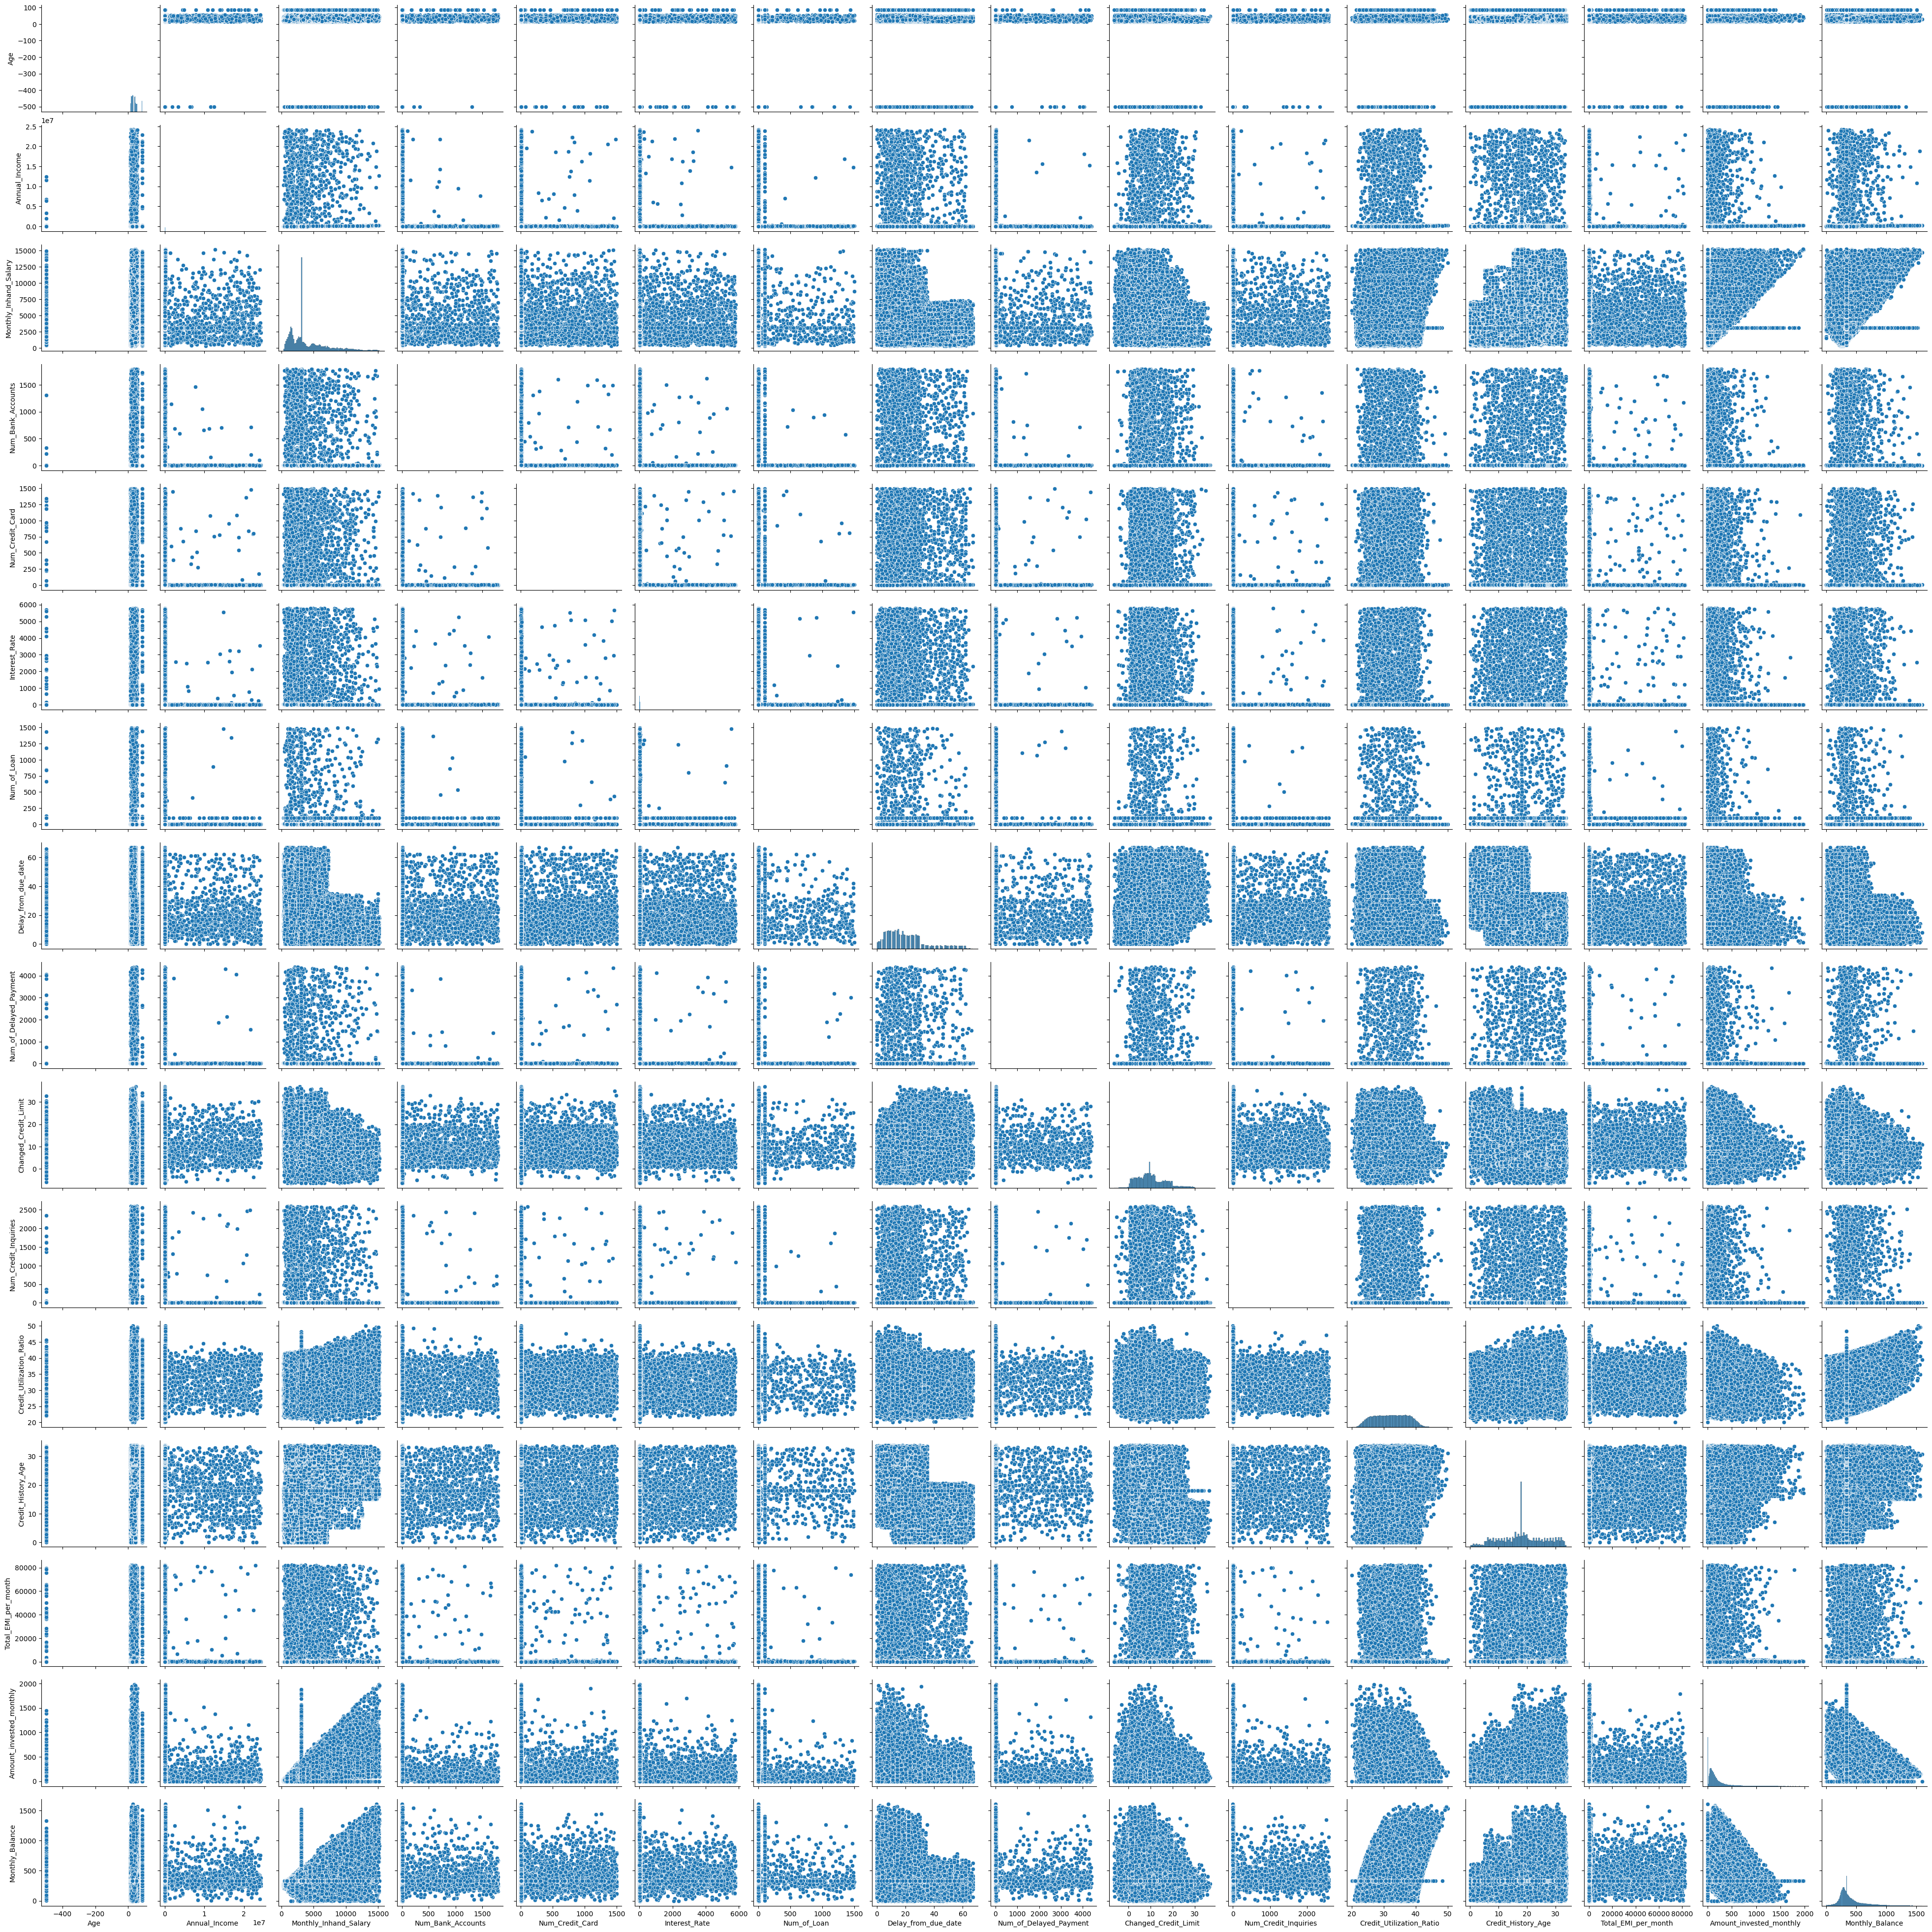

In [104]:
sns.pairplot(train)

In [105]:
plt.figure(figsize=(10,8))
sns.heatmap(train.corr(),annot=True)

<AxesSubplot:>

here we performed uivariate and bivariate analysis by heatmap and pairplot

Step 9: Separate your Train dataset and test data set if you combined them in the initial 
steps. (In this step only segregate train and test datasets based on the length of the train 
and test dataset)
Note: Your given test dataset is only for validating and submitting the results. Only 
Use the Train dataset to perform the train test split in the coming steps. Do not use Test to 
build the model and test the model, Since there is no target variable in the test data set you 
can not test the model performance with the test data set. Thus we only consider the 
training dataset and split that into X_train and X_test.

In [107]:
#Both train and test data are all ready reperated

Step 11: Perform the Statistical analysis to prove where the independent variables have an 
effect on the Target variables.
 Example: Few statistical analyses:
1. Check whether the Annual income across all the target variables is significantly the 
same. Let's fix the alpha is 0.05. Make sure the data is normal and the variance is 
equal. If not use a Non-parametric statistical test.
2. Check if there is an independence of the Occupation and Credit Score. The significant 
level is 0.05.
3. Check if there is a relationship between the Payment Behaviour and Credit Score.
4. Check Statistically that the Credit_Utilization_Ratio median values are significantly 
not different across the target variable classes. 

In [108]:
train.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                           int32
SSN                          object
Occupation                   object
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int32
Type_of_Loan                 object
Delay_from_due_date         float64
Num_of_Delayed_Payment        int32
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour            object
Monthly_Balance             float64
Credit_Score                

In [109]:
from scipy import stats
from scipy.stats import shapiro

In [110]:
train_num=train.select_dtypes(include=np.number)

In [111]:
train_num

Age  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  \
0       23       19114.12            1824.843333                  3   
1       23       19114.12            3093.745000                  3   
2     -500       19114.12            3093.745000                  3   
3       23       19114.12            3093.745000                  3   
4       23       19114.12            1824.843333                  3   
...    ...            ...                    ...                ...   
99995   25       39628.99            3359.415833                  4   
99996   25       39628.99            3359.415833                  4   
99997   25       39628.99            3359.415833                  4   
99998   25       39628.99            3359.415833                  4   
99999   25       39628.99            3359.415833                  4   

       Num_Credit_Card  Interest_Rate  Num_of_Loan  Delay_from_due_date  \
0                    4              3            4                  3.0   
1                    4              3            4                 18.0   
2                    4              3            4                  3.0   
3                    4              3            4                  5.0   
4                    4              3            4                  6.0   
...                ...            ...          ...                  ...   
99995                6              7            2                 23.0   
99996                6              7            2                 18.0   
99997                6           5729            2                 27.0   
99998                6              7            2                 20.0   
99999                6              7            2                 18.0   

       Num_of_Delayed_Payment  Changed_Credit_Limit  Num_Credit_Inquiries  \
0                           7                 11.27                   4.0   
1                          14                 11.27                   4.0   
2                           7                  9.40                   4.0   
3                           4                  6.27                   4.0   
4                          14                 11.27                   4.0   
...                       ...                   ...                   ...   
99995                       7                 11.50                   3.0   
99996                       7                 11.50                   3.0   
99997                       6                 11.50                   3.0   
99998                      14                 11.50                   3.0   
99999                       6                 11.50                   3.0   

       Credit_Utilization_Ratio  Credit_History_Age  Total_EMI_per_month  \
0                     26.822620                22.1            49.574949   
1                     31.944960                18.1            49.574949   
2                     28.609352                22.3            49.574949   
3                     31.377862                22.4            49.574949   
4                     24.797347                22.5            49.574949   
...                         ...                 ...                  ...   
99995                 34.663572                31.6            35.104023   
99996                 40.565631                31.7            35.104023   
99997                 41.255522                31.8            35.104023   
99998                 33.638208                31.9            35.104023   
99999                 34.192463                31.1            35.104023   

       Amount_invested_monthly  Monthly_Balance  
0                    80.415295       312.494089  
1                   118.280222       284.629162  
2                    81.699521       331.209863  
3                   199.458074       223.451310  
4                    41.420153       341.489231  
...                        ...              ...  
99995                60.971333       336.449266  
99996          

In [112]:
stats,p_value=stats.shapiro(train_num)
print('Test statistic:', stats)
print('P-Value:', p_value)

Test statistic: 0.010034382343292236
P-Value: 0.0


In [113]:
#inference - From the above result, we can see that the p-value is less than 0.05 then reject null hypothesis, thus we can say that the data is not normally distributed.
# to check independency of variable we are using chi-square test for the independence

In [114]:
# perform one way anova test to check the mean of varibale with respect to target variables

In [115]:
# import the functions to perform Chi-square tests
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare

In [116]:
#Ho-variable is independent
#H1-variable is not independent

In [117]:
#Check whether the Annual income across all the target variables is significantly the same. 
#Let's fix the alpha is 0.05. Make sure the data is normal and the variance is equal. If not use a Non-parametric statistical test.

In [118]:
train.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [119]:
table = pd.crosstab(train['Credit_Score'], train['Annual_Income'])
observed_value = table.values
observed_value

array([[0, 0, 0, ..., 0, 0, 1],
       [8, 7, 6, ..., 0, 0, 0],
       [0, 1, 2, ..., 1, 1, 0]], dtype=int64)

In [120]:
test_stats,p_value,dof,expected_value=chi2_contingency(observed=observed_value,correction=False)
print("Test statistic:", test_stats)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 134413.15470134557
p-value: 0.0
Degrees of freedom: 26972
Expected values: [[1.42624 1.42624 1.42624 ... 0.17828 0.17828 0.17828]
 [2.31984 2.31984 2.31984 ... 0.28998 0.28998 0.28998]
 [4.25392 4.25392 4.25392 ... 0.53174 0.53174 0.53174]]


In [121]:
# inference - p_value is < 0.05 reject the null hypothesis which means the two variables are not independent

In [122]:
#Check if there is an independence of the Occupation and Credit Score. The significant level is 0.05.

In [123]:
#Ho-variable is independent
#H1-variable is not independent

In [124]:
table = pd.crosstab(train['Credit_Score'], train['Occupation'])
observed_value = table.values
observed_value

array([[1128, 1144, 1134, 1082, 1182, 1080, 1173, 2405, 1098, 1024, 1161,
        1110, 1127, 1143,  837],
       [1879, 1734, 1792, 1661, 1932, 1896, 1725, 3841, 1732, 1896, 1645,
        1670, 1921, 1895, 1779],
       [3264, 3477, 3309, 3344, 3236, 3198, 3187, 7391, 3143, 3371, 3426,
        3131, 3251, 3177, 3269]], dtype=int64)

In [125]:
test_stats,p_value,dof,expected_value=chi2_contingency(observed=observed_value,correction=False)
print("Test statistic:", test_stats)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 168.10480126791416
p-value: 6.212511377729724e-22
Degrees of freedom: 28
Expected values: [[1117.99388 1132.9694  1111.5758  1085.19036 1132.078   1100.70072
  1084.8338  2431.20436 1064.86644 1121.55948 1111.04096 1053.81308
  1122.98572 1108.0102  1049.1778 ]
 [1818.46458 1842.8229  1808.0253  1765.10826 1841.373   1790.33652
  1764.5283  3954.45726 1732.05054 1824.26418 1807.15536 1714.07178
  1826.58402 1802.2257  1706.5323 ]
 [3334.54154 3379.2077  3315.3989  3236.70138 3376.549   3282.96276
  3235.6379  7251.33838 3176.08302 3345.17634 3313.80368 3143.11514
  3349.43026 3304.7641  3129.2899 ]]


In [126]:
#inference - as the p_value is > then 0.05 fail to reject null which means the varibles 'occupation' and target varible are independent

In [127]:
#Check if there is a relationship between the Payment Behaviour and Credit Score

In [128]:
#Ho-variable is independent
#H1-variable is not independent

In [129]:
table = pd.crosstab(train['Credit_Score'], train['Payment_Behaviour'])
observed_value = table.values
observed_value

array([[ 3172,  3524,  2114,  1880,  2482,  4656],
       [ 2979,  4439,  3088,  2931,  4211, 11350],
       [ 7570,  9577,  6138,  5614,  7168, 17107]], dtype=int64)

In [130]:
test_stats,p_value,dof,expected_value=chi2_contingency(observed=observed_value,correction=False)
print("Test statistic:", test_stats)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 1249.38890936874
p-value: 3.1907303798466974e-262
Degrees of freedom: 10
Expected values: [[ 2446.17988  3127.0312   2021.6952   1858.569    2471.13908  5903.38564]
 [ 3978.81558  5086.2492   3288.3732   3023.0415   4019.41278  9602.10774]
 [ 7296.00454  9326.7196   6029.9316   5543.3895   7370.44814 17607.50662]]


In [131]:
##inference - as the p_value is > then 0.05 fail to reject null which means the varibles 'Payment_Behaviour' and target varible are independent

In [132]:
#Check Statistically that the Credit_Utilization_Ratio median values are significantly not different across the target variable classes.

In [133]:
#one-way ANOVA
#The null and alternative hypothesis is:

#H0: The average score of all races/ethnicities is same
#H1: At least one race/ethnicity has a different average score

In [134]:
cs_1 = train[train['Credit_Score'] == 'Good']['Credit_Utilization_Ratio']
cs_2 = train[train['Credit_Score'] == 'Standard']['Credit_Utilization_Ratio']
cs_3 = train[train['Credit_Score'] == 'Poor']['Credit_Utilization_Ratio']

In [135]:
train['Credit_Utilization_Ratio'].unique()

array([26.82261962, 31.94496006, 28.60935202, ..., 41.25552226,
       33.63820798, 34.19246265])

In [138]:
import scipy.stats
test_stats, p_val = scipy.stats.f_oneway(cs_1,cs_2,cs_3)

# print the test statistic and corresponding p-value
print('Test statistic:', test_stats)
print('p-value:', p_val)

Test statistic: 105.29672169033603
p-value: 2.0811372175521815e-46


In [139]:
#Step 12: Encode the categorical variables with related technologies. Change the target 
#variable classes as (poor to 0, Standard to 1, Good to 2).

In [140]:
from sklearn.preprocessing import LabelEncoder

# Encode the categorical variables using label encoding
le = LabelEncoder()
train['Month'] = le.fit_transform(train['Month'])
train['Name'] = le.fit_transform(train['Name'])
train['SSN'] = le.fit_transform(train['SSN'])
train['Occupation'] = le.fit_transform(train['Occupation'])
train['Payment_Behaviour'] = le.fit_transform(train['Payment_Behaviour'])
train['Credit_Mix'] = le.fit_transform(train['Credit_Mix'])
train['Payment_of_Min_Amount'] = le.fit_transform(train['Payment_of_Min_Amount'])
train['Type_of_Loan'] = le.fit_transform(train['Type_of_Loan'])
# Change the target variable classes
train['Credit_Score'] = train['Credit_Score'].map({'Poor': 0, 'Standard': 1, 'Good': 2})

# Print the encoded and transformed dataset
train.head()

ID Customer_ID  Month  Name  Age    SSN  Occupation  Annual_Income  \
0  0x1602   CUS_0xd40      3    84   23  10204          12       19114.12   
1  0x1603   CUS_0xd40      2    84   23  10204          12       19114.12   
2  0x1604   CUS_0xd40      6    84 -500  10204          12       19114.12   
3  0x1605   CUS_0xd40      0    84   23  10204          12       19114.12   
4  0x1606   CUS_0xd40      7    84   23  10204          12       19114.12   

   Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0            1824.843333                  3  ...           2   
1            3093.745000                  3  ...           1   
2            3093.745000                  3  ...           1   
3            3093.745000                  3  ...           1   
4            1824.843333                  3  ...           1   

   Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0            809.98                 26.822620                22.1   
1            809.98                 31.944960                18.1   
2            809.98                 28.609352                22.3   
3            809.98                 31.377862                22.4   
4            809.98                 24.797347                22.5   

   Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                      1            49.574949                80.415295   
1                      1            49.574949               118.280222   
2                      1            49.574949                81.699521   
3                      1            49.574949               199.458074   
4                      1            49.574949                41.420153   

   Payment_Behaviour  Monthly_Balance Credit_Score  
0                  2       312.494089            2  
1                  3       284.629162            2  
2                  4       331.209863            2  
3                  5       223.451310            2  
4                  1       341.489231            2  

[5 rows x 28 columns]

In [141]:
train.dtypes

ID                           object
Customer_ID                  object
Month                         int32
Name                          int32
Age                           int32
SSN                           int32
Occupation                    int32
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int32
Type_of_Loan                  int32
Delay_from_due_date         float64
Num_of_Delayed_Payment        int32
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                    int32
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int32
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour             int32
Monthly_Balance             float64
Credit_Score                

In [142]:
train['Outstanding_Debt'].unique()

array(['809.98', '605.03', '1303.01', ..., '620.64', '3571.7', '502.38'],
      dtype=object)

In [143]:
train['Outstanding_Debt'] = train['Outstanding_Debt'] .str.replace('\D+','.')
train['Outstanding_Debt']  = train['Outstanding_Debt'] .str.rstrip('.')
train.head()

ID Customer_ID  Month  Name  Age    SSN  Occupation  Annual_Income  \
0  0x1602   CUS_0xd40      3    84   23  10204          12       19114.12   
1  0x1603   CUS_0xd40      2    84   23  10204          12       19114.12   
2  0x1604   CUS_0xd40      6    84 -500  10204          12       19114.12   
3  0x1605   CUS_0xd40      0    84   23  10204          12       19114.12   
4  0x1606   CUS_0xd40      7    84   23  10204          12       19114.12   

   Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0            1824.843333                  3  ...           2   
1            3093.745000                  3  ...           1   
2            3093.745000                  3  ...           1   
3            3093.745000                  3  ...           1   
4            1824.843333                  3  ...           1   

   Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0            809.98                 26.822620                22.1   
1            809.98                 31.944960                18.1   
2            809.98                 28.609352                22.3   
3            809.98                 31.377862                22.4   
4            809.98                 24.797347                22.5   

   Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                      1            49.574949                80.415295   
1                      1            49.574949               118.280222   
2                      1            49.574949                81.699521   
3                      1            49.574949               199.458074   
4                      1            49.574949                41.420153   

   Payment_Behaviour  Monthly_Balance Credit_Score  
0                  2       312.494089            2  
1                  3       284.629162            2  
2                  4       331.209863            2  
3                  5       223.451310            2  
4                  1       341.489231            2  

[5 rows x 28 columns]

In [144]:
train['Outstanding_Debt']=train['Outstanding_Debt'].astype(float)

In [145]:
train.Amount_invested_monthly=train.Amount_invested_monthly.astype(int)

In [146]:
train.Amount_invested_monthly=train.Amount_invested_monthly.astype(float)

In [147]:
#Step 13: Scale the numerical features (optional)
   

In [148]:
from sklearn.preprocessing import StandardScaler

In [149]:
sc=StandardScaler()
train_n = ['Annual_Income','Monthly_Inhand_Salary','Delay_from_due_date','Num_of_Delayed_Payment','Changed_Credit_Limit','Num_Credit_Inquiries','Credit_Utilization_Ratio',
             'Outstanding_Debt','Credit_History_Age','Total_EMI_per_month','Monthly_Balance']
for i in train[train_n]:
    train[i] = sc.fit_transform(train[[i]])
train.head()

ID Customer_ID  Month  Name  Age    SSN  Occupation  Annual_Income  \
0  0x1602   CUS_0xd40      3    84   23  10204          12      -0.110031   
1  0x1603   CUS_0xd40      2    84   23  10204          12      -0.110031   
2  0x1604   CUS_0xd40      6    84 -500  10204          12      -0.110031   
3  0x1605   CUS_0xd40      0    84   23  10204          12      -0.110031   
4  0x1606   CUS_0xd40      7    84   23  10204          12      -0.110031   

   Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0              -0.744337                  3  ...           2   
1              -0.315849                  3  ...           1   
2              -0.315849                  3  ...           1   
3              -0.315849                  3  ...           1   
4              -0.744337                  3  ...           1   

   Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
0         -0.533485                 -1.067562            0.474559   
1         -0.533485                 -0.066489           -0.029736   
2         -0.533485                 -0.718376            0.499773   
3         -0.533485                 -0.177318            0.512381   
4         -0.533485                 -1.463366            0.524988   

   Payment_of_Min_Amount  Total_EMI_per_month  Amount_invested_monthly  \
0                      1             -0.16296                     80.0   
1                      1             -0.16296                    118.0   
2                      1             -0.16296                     81.0   
3                      1             -0.16296                    199.0   
4                      1             -0.16296                     41.0   

   Payment_Behaviour  Monthly_Balance  Credit_Score  
0                  2        -0.416137             2  
1                  3        -0.548281             2  
2                  4        -0.327380             2  
3                  5        -0.838406             2  
4                  1        -0.278632             2  

[5 rows x 28 columns]

In [150]:
df_train=train[[ 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment','Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score']]

In [151]:
df_train

Month  Name  Age    SSN  Occupation  Annual_Income  \
0          3    84   23  10204          12      -0.110031   
1          2    84   23  10204          12      -0.110031   
2          6    84 -500  10204          12      -0.110031   
3          0    84   23  10204          12      -0.110031   
4          7    84   23  10204          12      -0.110031   
...      ...   ...  ...    ...         ...            ...   
99995      0  6528   25   1008           9      -0.095681   
99996      7  6528   25   1008           9      -0.095681   
99997      5  6528   25   1008           9      -0.095681   
99998      4  6528   25   1008           9      -0.095681   
99999      1  6528   25   1008           9      -0.095681   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0                  -0.744337                  3                4   
1                  -0.315849                  3                4   
2                  -0.315849                  3                4   
3                  -0.315849                  3                4   
4                  -0.744337                  3                4   
...                      ...                ...              ...   
99995              -0.226137                  4                6   
99996              -0.226137                  4                6   
99997              -0.226137                  4                6   
99998              -0.226137                  4                6   
99999              -0.226137                  4                6   

       Interest_Rate  ...  Credit_Mix  Outstanding_Debt  \
0                  3  ...           2         -0.533485   
1                  3  ...           1         -0.533485   
2                  3  ...           1         -0.533485   
3                  3  ...           1         -0.533485   
4                  3  ...           1         -0.533485   
...              ...  ...         ...               ...   
99995              7  ...           2         -0.799776   
99996              7  ...           2         -0.799776   
99997           5729  ...           1         -0.799776   
99998              7  ...           1         -0.799776   
99999              7  ...           1         -0.799776   

       Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
0                     -1.067562            0.474559                      1   
1                     -0.066489           -0.029736                      1   
2                     -0.718376            0.499773                      1   
3                     -0.177318            0.512381                      1   
4                     -1.463366            0.524988                      1   
...                         ...                 ...                    ...   
99995                  0.464817            1.672258                      1   
99996                  1.618273            1.684865                      1   
99997                  1.753100            1.697472                      1   
99998                  0.264427            1.710080                      1   
99999                  0.372747            1.609221                      1   

       Total_EMI_per_month  Amount_invested_monthly  Payment_Behaviour  \
0                -0.162960                     80.0                  2   
1                -0.162960                    118.0                  3   
2                -0.162960                     81.0                  4   
3                -0.162960                    199.0                  5   
4                -0.162960                     41.0                  1   
...                    ...                      ...                ...   
99995            -0.164702                     60.0                  0   
99996            -0.164702                     54.0                  1   
99997            -0.164702                     24.0                  0   
99998            -0.164702                    251.0                  3 

In [152]:
df_train.isnull().sum()

Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [153]:
float_cols = df_train.select_dtypes(include=['float'])

df_train[float_cols.columns] = float_cols.round(2)

In [154]:
df_train

Month  Name  Age    SSN  Occupation  Annual_Income  \
0          3    84   23  10204          12          -0.11   
1          2    84   23  10204          12          -0.11   
2          6    84 -500  10204          12          -0.11   
3          0    84   23  10204          12          -0.11   
4          7    84   23  10204          12          -0.11   
...      ...   ...  ...    ...         ...            ...   
99995      0  6528   25   1008           9          -0.10   
99996      7  6528   25   1008           9          -0.10   
99997      5  6528   25   1008           9          -0.10   
99998      4  6528   25   1008           9          -0.10   
99999      1  6528   25   1008           9          -0.10   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0                      -0.74                  3                4   
1                      -0.32                  3                4   
2                      -0.32                  3                4   
3                      -0.32                  3                4   
4                      -0.74                  3                4   
...                      ...                ...              ...   
99995                  -0.23                  4                6   
99996                  -0.23                  4                6   
99997                  -0.23                  4                6   
99998                  -0.23                  4                6   
99999                  -0.23                  4                6   

       Interest_Rate  ...  Credit_Mix  Outstanding_Debt  \
0                  3  ...           2             -0.53   
1                  3  ...           1             -0.53   
2                  3  ...           1             -0.53   
3                  3  ...           1             -0.53   
4                  3  ...           1             -0.53   
...              ...  ...         ...               ...   
99995              7  ...           2             -0.80   
99996              7  ...           2             -0.80   
99997           5729  ...           1             -0.80   
99998              7  ...           1             -0.80   
99999              7  ...           1             -0.80   

       Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
0                         -1.07                0.47                      1   
1                         -0.07               -0.03                      1   
2                         -0.72                0.50                      1   
3                         -0.18                0.51                      1   
4                         -1.46                0.52                      1   
...                         ...                 ...                    ...   
99995                      0.46                1.67                      1   
99996                      1.62                1.68                      1   
99997                      1.75                1.70                      1   
99998                      0.26                1.71                      1   
99999                      0.37                1.61                      1   

       Total_EMI_per_month  Amount_invested_monthly  Payment_Behaviour  \
0                    -0.16                     80.0                  2   
1                    -0.16                    118.0                  3   
2                    -0.16                     81.0                  4   
3                    -0.16                    199.0                  5   
4                    -0.16                     41.0                  1   
...                    ...                      ...                ...   
99995                -0.16                     60.0                  0   
99996                -0.16                     54.0                  1   
99997                -0.16                     24.0                  0   
99998                -0.16                    251.0                  3 

In [155]:
#Step 14: Use a train test split on the dataset called a train.

In [156]:
from sklearn.model_selection import train_test_split

In [157]:
x = df_train.drop('Credit_Score',axis = 1)
y = df_train['Credit_Score']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.30, random_state=100)

In [158]:
print('xtrain:',xtrain.shape)
print('xtest:',xtest.shape)
print('ytrain:',ytrain.shape)
print('ytest:',ytest.shape)

xtrain: (70000, 25)
xtest: (30000, 25)
ytrain: (70000,)
ytest: (30000,)


In [159]:
#Step 15: Build the base model. Observe how the model is performing.

In [160]:
df_train

Month  Name  Age    SSN  Occupation  Annual_Income  \
0          3    84   23  10204          12          -0.11   
1          2    84   23  10204          12          -0.11   
2          6    84 -500  10204          12          -0.11   
3          0    84   23  10204          12          -0.11   
4          7    84   23  10204          12          -0.11   
...      ...   ...  ...    ...         ...            ...   
99995      0  6528   25   1008           9          -0.10   
99996      7  6528   25   1008           9          -0.10   
99997      5  6528   25   1008           9          -0.10   
99998      4  6528   25   1008           9          -0.10   
99999      1  6528   25   1008           9          -0.10   

       Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
0                      -0.74                  3                4   
1                      -0.32                  3                4   
2                      -0.32                  3                4   
3                      -0.32                  3                4   
4                      -0.74                  3                4   
...                      ...                ...              ...   
99995                  -0.23                  4                6   
99996                  -0.23                  4                6   
99997                  -0.23                  4                6   
99998                  -0.23                  4                6   
99999                  -0.23                  4                6   

       Interest_Rate  ...  Credit_Mix  Outstanding_Debt  \
0                  3  ...           2             -0.53   
1                  3  ...           1             -0.53   
2                  3  ...           1             -0.53   
3                  3  ...           1             -0.53   
4                  3  ...           1             -0.53   
...              ...  ...         ...               ...   
99995              7  ...           2             -0.80   
99996              7  ...           2             -0.80   
99997           5729  ...           1             -0.80   
99998              7  ...           1             -0.80   
99999              7  ...           1             -0.80   

       Credit_Utilization_Ratio  Credit_History_Age  Payment_of_Min_Amount  \
0                         -1.07                0.47                      1   
1                         -0.07               -0.03                      1   
2                         -0.72                0.50                      1   
3                         -0.18                0.51                      1   
4                         -1.46                0.52                      1   
...                         ...                 ...                    ...   
99995                      0.46                1.67                      1   
99996                      1.62                1.68                      1   
99997                      1.75                1.70                      1   
99998                      0.26                1.71                      1   
99999                      0.37                1.61                      1   

       Total_EMI_per_month  Amount_invested_monthly  Payment_Behaviour  \
0                    -0.16                     80.0                  2   
1                    -0.16                    118.0                  3   
2                    -0.16                     81.0                  4   
3                    -0.16                    199.0                  5   
4                    -0.16                     41.0                  1   
...                    ...                      ...                ...   
99995                -0.16                     60.0                  0   
99996                -0.16                     54.0                  1   
99997                -0.16                     24.0                  0   
99998                -0.16                    251.0                  3 

In [161]:
df_train.dtypes

Month                         int32
Name                          int32
Age                           int32
SSN                           int32
Occupation                    int32
Annual_Income               float64
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                   int32
Type_of_Loan                  int32
Delay_from_due_date         float64
Num_of_Delayed_Payment      float64
Changed_Credit_Limit        float64
Num_Credit_Inquiries        float64
Credit_Mix                    int32
Outstanding_Debt            float64
Credit_Utilization_Ratio    float64
Credit_History_Age          float64
Payment_of_Min_Amount         int32
Total_EMI_per_month         float64
Amount_invested_monthly     float64
Payment_Behaviour             int32
Monthly_Balance             float64
Credit_Score                  int64
dtype: object

In [162]:
df_train.isnull().sum()

Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

In [163]:
#Step 15: Build the base model. Observe how the model is performing.

In [164]:
#Base model

In [165]:
#sk learn model
lr=LogisticRegression(random_state=0)
model=lr.fit(xtrain,ytrain)
y_pred=model.predict(xtest)
y_pred[:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [166]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import statistics

In [167]:
classification_report(ytest,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.29      0.01      0.01      8750\n           1       0.53      0.99      0.69     15909\n           2       0.38      0.01      0.02      5341\n\n    accuracy                           0.53     30000\n   macro avg       0.40      0.34      0.24     30000\nweighted avg       0.44      0.53      0.37     30000\n'

In [168]:
#inference -  

In [169]:
#checking imbalanicing of data

In [170]:
df_train.groupby('Credit_Score').count()

Month   Name    Age    SSN  Occupation  Annual_Income  \
Credit_Score                                                          
0             28998  28998  28998  28998       28998          28998   
1             53174  53174  53174  53174       53174          53174   
2             17828  17828  17828  17828       17828          17828   

              Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  \
Credit_Score                                                              
0                             28998              28998            28998   
1                             53174              53174            53174   
2                             17828              17828            17828   

              Interest_Rate  ...  Num_Credit_Inquiries  Credit_Mix  \
Credit_Score                 ...                                     
0                     28998  ...                 28998       28998   
1                     53174  ...                 53174       53174   
2                     17828  ...                 17828       17828   

              Outstanding_Debt  Credit_Utilization_Ratio  Credit_History_Age  \
Credit_Score                                                                   
0                        28998                     28998               28998   
1                        53174                     53174               53174   
2                        17828                     17828               17828   

              Payment_of_Min_Amount  Total_EMI_per_month  \
Credit_Score                                               
0                             28998                28998   
1                             53174                53174   
2                             17828                17828   

              Amount_invested_monthly  Payment_Behaviour  Monthly_Balance  
Credit_Score                                                               
0                               28998              28998            28998  
1                               53174              53174            53174  
2                               17828              17828            17828  

[3 rows x 25 columns]

In [171]:
sns.countplot(df_train['Credit_Score'])

<AxesSubplot:xlabel='Credit_Score', ylabel='count'>

In [172]:
#inference - data is imbalance hence we need to do SMOTE analysis to balance the data

In [173]:
#SMOTE Analysis

In [174]:
! pip install imblearn

     -------------------------------------- 226.0/226.0 kB 1.1 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 1.1 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [175]:
from imblearn.over_sampling import SMOTE

In [176]:
sm=SMOTE()
x=df_train.drop('Credit_Score',axis=1)
y=df_train['Credit_Score']
x_res,y_res=sm.fit_resample(x,y)
xtrain,xtest,ytrain,ytest=train_test_split(x_res,y_res,test_size=0.30,random_state=10)

In [177]:
#Step 16: Build other models and choose the model which gives the best results.

In [178]:
from sklearn.ensemble import GradientBoostingClassifier
gboost_model= GradientBoostingClassifier(n_estimators=30,max_depth=10,
                                        learning_rate=0.1,random_state=10)
gboost_model.fit(xtrain,ytrain)

GradientBoostingClassifier(max_depth=10, n_estimators=30, random_state=10)

In [179]:
ytest_pred=gboost_model.predict(xtest)
ytest_pred_prob=gboost_model.predict_proba(xtest)
print(classification_report(ytest,ytest_pred))
ytrain_pred=gboost_model.predict(xtrain)
ytrain_pred_prob=gboost_model.predict_proba(xtrain)
print(classification_report(ytrain,ytrain_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82     16104
           1       0.79      0.71      0.75     16030
           2       0.79      0.89      0.84     15723

    accuracy                           0.80     47857
   macro avg       0.80      0.80      0.80     47857
weighted avg       0.80      0.80      0.80     47857

              precision    recall  f1-score   support

           0       0.88      0.85      0.87     37070
           1       0.86      0.79      0.82     37144
           2       0.84      0.94      0.88     37451

    accuracy                           0.86    111665
   macro avg       0.86      0.86      0.86    111665
weighted avg       0.86      0.86      0.86    111665



In [180]:
# inference - as the accuracy value is 0.86 we can say that it is good model

In [181]:
#Step 17: Perform Feature selection using different feature selection methods.

In [182]:
#Step 19: Tune the final model using Grid search CV or Randomized CV or any other 
#methods.

In [183]:
#to improve accuracy used hyper parameters

In [184]:
from sklearn.model_selection import GridSearchCV
tunned_parameters=[{'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6],
                   'n_estimators':[10,30,50,70,90],
                   'max_depth':range(3,10),
                   'min_samples_split':[50,100,150]}]
Gradient_Boosting_classification=GradientBoostingClassifier(random_state=100)

In [185]:
gb_grid=GridSearchCV(estimator=Gradient_Boosting_classification,
                    param_grid=tunned_parameters,
                    cv=5)

In [ ]:
gb_grid_model=gb_grid.fit(xtrain,ytrain)

In [ ]:
print('Best Parameters:',gb_grid_model.best_params_)

In [ ]:
gb_grid_m=GradientBoostingClassifier(learning_rate=gb_grid_model.best_params_.get('learning_rate'),
                            max_depth=gb_grid_model.best_params_.get('max_depth'),
                            n_estimators=gb_grid_model.best_params_.get('n_estimator'),
                            min_samples_split=gb_grid_model.best_params_.get('min_samples_split'))         
gb_best_model=gb_grid_m.fit(xtrain,ytrain)


In [ ]:
ytrain_pred=gb_best_model.predict(xtrain)
print(classification_report(ytrain,ytrain_pred))

In [ ]:
#inference - 

In [ ]:
#Step 20: Perform Cross-validation for the final model by setting the best parameters.
from sklearn.model_selection import cross_val_score
scores = cross_val_score(estimator=gb_grid_m, X = xtrain, y = ytrain, cv = 10, scoring = 'accuracy')
print('Mean accuracy after 10 fold cross validation ', round(scores.mean(),2))

#Step 21: Write down the overall business insight. 
We see that the accuracy of the logistic regression model is 0.86. After applying the gradient boosting classifier the accuracy of the model is improved by 2 % that is 0.88.After applying the k fold cross validation for 10 folds the accuracy which we got was 0.85 which is 1% less than logistic regression model.

